<a href="https://colab.research.google.com/github/AfiyaHumaira/MLP-XOR-Classifier/blob/main/MLP_XOR_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# XOR Dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

In [14]:
# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(output):
    return output * (1 - output)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

In [15]:
# Configurations (Tunable)
activation = 'sigmoid'     # 'sigmoid' or 'relu'
learning_rate = 0.1        # Try 0.01, 0.1, 0.5
epochs = 5000              # Try 500, 1000, 5000

In [16]:
# Activation selector
act_fn = sigmoid if activation == 'sigmoid' else relu
act_deriv = sigmoid_derivative if activation == 'sigmoid' else relu_derivative

In [17]:
# Weights Initialization
np.random.seed(42)
W1 = np.random.randn(2, 2)
b1 = np.zeros((1, 2))
W2 = np.random.randn(2, 1)
b2 = np.zeros((1, 1))

In [18]:
# Training Loop
for epoch in range(epochs):
    # Forward pass
    Z1 = np.dot(X, W1) + b1
    A1 = act_fn(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    # Compute loss (MSE)
    loss = np.mean((y - A2)**2)

    # Backward pass
    dA2 = (y - A2) * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dA2)
    db2 = np.sum(dA2, axis=0, keepdims=True)

    dA1 = np.dot(dA2, W2.T) * act_deriv(A1)
    dW1 = np.dot(X.T, dA1)
    db1 = np.sum(dA1, axis=0, keepdims=True)

    # Update weights and biases
    W2 += learning_rate * dW2
    b2 += learning_rate * db2
    W1 += learning_rate * dW1
    b1 += learning_rate * db1

Expected:   [0 1 1 0]
Predicted:  [0 0 1 1]

Evaluation Metrics:
Accuracy:  0.50
Precision: 0.50
Recall:    0.50
F1 Score:  0.50


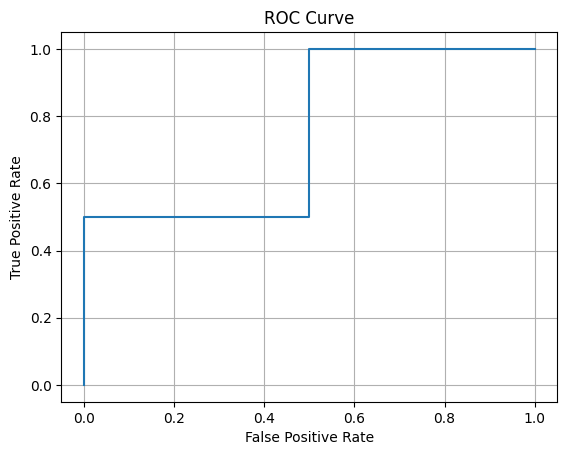

In [19]:
# Final Predictions
Z1 = np.dot(X, W1) + b1
A1 = act_fn(Z1)
Z2 = np.dot(A1, W2) + b2
output_probs = sigmoid(Z2)
output_preds = (output_probs > 0.5).astype(int)

# Print final predictions
print("Expected:  ", y.ravel())
print("Predicted: ", output_preds.ravel())

# Evaluation Metrics from Scratch
def evaluate_metrics(y_true, y_pred, y_prob):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = (TP + TN) / len(y_true)
    precision = TP / (TP + FP + 1e-8)
    recall = TP / (TP + FN + 1e-8)
    f1 = 2 * precision * recall / (precision + recall + 1e-8)

    print("\nEvaluation Metrics:")
    print(f"Accuracy:  {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall:    {recall:.2f}")
    print(f"F1 Score:  {f1:.2f}")

    # ROC Curve
    thresholds = np.linspace(0, 1, 100)
    tpr_list, fpr_list = [], []

    for t in thresholds:
        preds = (y_prob >= t).astype(int)
        TP = np.sum((y_true == 1) & (preds == 1))
        TN = np.sum((y_true == 0) & (preds == 0))
        FP = np.sum((y_true == 0) & (preds == 1))
        FN = np.sum((y_true == 1) & (preds == 0))
        TPR = TP / (TP + FN + 1e-8)
        FPR = FP / (FP + TN + 1e-8)
        tpr_list.append(TPR)
        fpr_list.append(FPR)

    plt.plot(fpr_list, tpr_list)
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid()
    plt.show()

evaluate_metrics(y.ravel(), output_preds.ravel(), output_probs.ravel())